<a href="https://colab.research.google.com/github/navyadeshmukh/vision-modelx/blob/main/ANNs/MNIST_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementation of Hand-written digit recognition model (Using MNIST dataset) from scratch using Numpy and Matplotlib.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Mounting drive to runtime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset loading and Preprocessing

In [ ]:
# Load images
def load_images(filename):
    with open(filename, 'rb') as f:
        f.read(16)  # Skip the metadata
        data = np.fromfile(f, dtype=np.uint8).reshape(-1, 784)
    return data

def load_labels(filename):
    with open(filename, 'rb') as f:
        f.read(8)  # Skip the metadata
        labels = np.fromfile(f, dtype=np.uint8)
    return labels


# Load data
X_train = load_images('/content/drive/MyDrive/Colab Notebooks/Datasets/MNIST dataset/train-images.idx3-ubyte')
y_train = load_labels('/content/drive/MyDrive/Colab Notebooks/Datasets/MNIST dataset/train-labels.idx1-ubyte')

X_test = load_images('/content/drive/MyDrive/Colab Notebooks/Datasets/MNIST dataset/t10k-images.idx3-ubyte')
y_test = load_labels('/content/drive/MyDrive/Colab Notebooks/Datasets/MNIST dataset/t10k-labels.idx1-ubyte')

Converting to Numpy arrays and normalizing

In [ ]:
X_train = X_train.T.astype(np.float32) / 255.0
X_test = X_test.T.astype(np.float32) / 255.0

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}\n")

Defining functions for working with the Neural Networks

In [ ]:
# Softmax
def softmax(z):
   z -= np.max(z, axis=0, keepdims=True)
   exp_z = np.exp(z)
   return exp_z / np.sum(exp_z, axis=0, keepdims=True)

# One-hot encode labels
def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))  # Step 1: create a matrix of zeros
    one_hot_y[np.arange(y.size), y] = 1          # Step 2: set appropriate positions to 1, vectorized method-advance indexing
    one_hot_y = one_hot_y.T
    return one_hot_y                           # y=(10,m)

y_train_onehot = one_hot(y_train)
y_test_onehot = one_hot(y_test)


# Initialize weights and biases
W = np.random.randn(10, 784) * 0.01            # x=(784,m)
b = np.ones((10, 1)) * 0.01


Its a One-layered Neural Network

Output Layer : Softmax activation, 10 nodes

In [ ]:
# Training
epochs = 500

learning_rate = 0.5
decay_rate = 0.01

losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(epochs):

    lr = learning_rate / (1 + decay_rate * epoch)


    # Forward pass
    Z = np.dot(W,X_train) + b                  # z =(10,m)
    A = softmax(Z)

    # Loss (cross-entropy)
    m = y_train.shape[0]                                   # element-wise multiplication
    loss = -np.sum(y_train_onehot * np.log(A)) / m         # (10,m)*(10,m)

    # Backward pass
    dZ = (A - y_train_onehot) / m
    dW = np.dot(dZ,X_train.T)                    # (10,784)
    db = np.sum(dZ, axis=1, keepdims=True)       # (10,1)

    # Update weights
    W -= lr * dW
    b -= lr * db

    # Evaluate accuracy
    Z_test = np.dot(W,X_test) + b
    A_test = softmax(Z_test)
    predictions = np.argmax(A_test, axis=0)
    accuracy = np.mean(predictions == y_test)

    train_predictions = np.argmax(A, axis=0)
    train_accuracy = np.mean(train_predictions == y_train)


    if(epoch==0 or (epoch+1)%50==0):
        print(f"Epoch {epoch+1}, Loss: {loss:.4f}, Test Accuracy: {accuracy * 100:.2f}%")

    losses.append(loss)
    test_accuracies.append(accuracy)
    train_accuracies.append(train_accuracy)

X_train shape: (784, 60000)
y_train shape: (60000,)
X_test shape: (784, 10000)
y_test shape: (10000,)

Epoch 1, Loss: 2.3116, Test Accuracy: 65.75%
Epoch 50, Loss: 0.4875, Test Accuracy: 88.56%
Epoch 100, Loss: 0.4255, Test Accuracy: 89.62%
Epoch 150, Loss: 0.4003, Test Accuracy: 89.98%
Epoch 200, Loss: 0.3859, Test Accuracy: 90.30%
Epoch 250, Loss: 0.3763, Test Accuracy: 90.50%
Epoch 300, Loss: 0.3694, Test Accuracy: 90.61%
Epoch 350, Loss: 0.3641, Test Accuracy: 90.68%
Epoch 400, Loss: 0.3598, Test Accuracy: 90.77%
Epoch 450, Loss: 0.3563, Test Accuracy: 90.85%
Epoch 500, Loss: 0.3533, Test Accuracy: 90.87%


Predicted Outputs

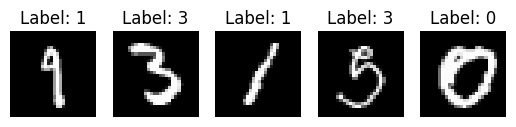

In [ ]:
# Randomize test set
random_index = np.random.permutation(len(y_test))
y_test = y_test[random_index]
X_test = X_test[:, random_index]
predictions = predictions[random_index]


# Pick one sample to visualize
sample_idx = 0
image = X_test[:, sample_idx].reshape(28, 28)
predicted_label = predictions[sample_idx]
plt.title(f"Label: {predicted_label}")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.show()
print('\n')

Displaying Test Data Accuracy and loss on the optimized model.

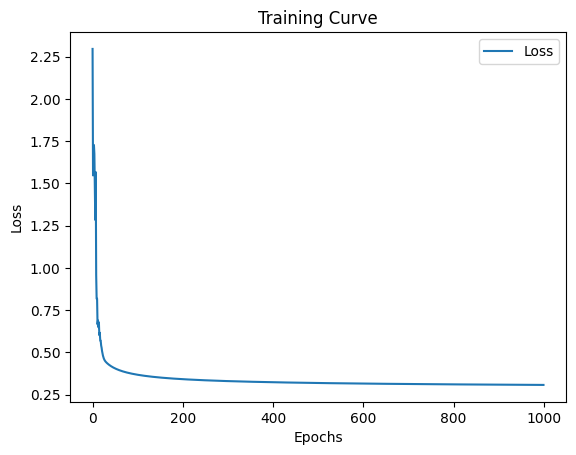

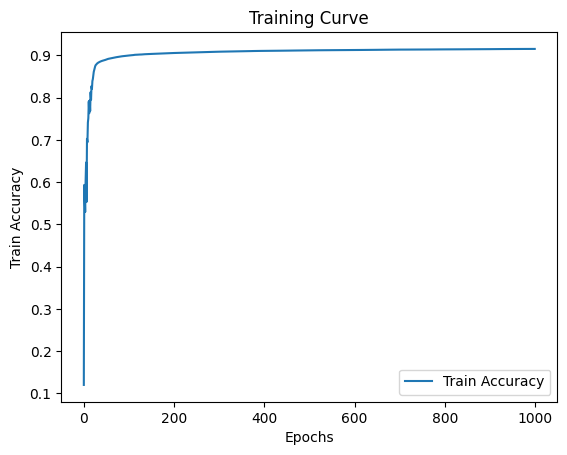

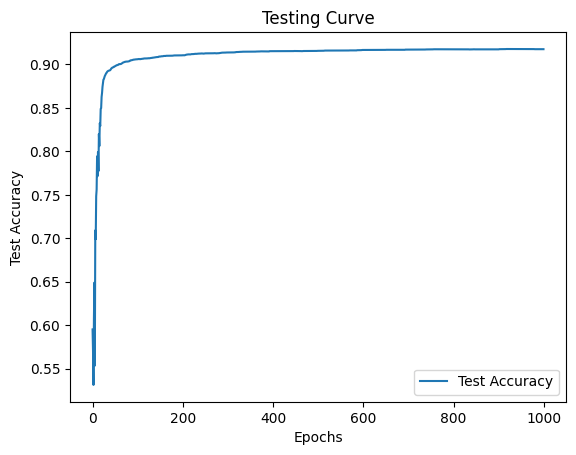

In [ ]:
import matplotlib.pyplot as plt
# Plotting loss and accuracy

def loss_curve(losses, epochs):
    plt.plot(losses, label='Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training Curve')

    plt.show()

def train_accuracy_curve(accuracies, epochs):
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Train Accuracy')
    plt.legend()
    plt.title('Training Curve')
    plt.show()

def test_accuracy_curve(accuracies, epochs):
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Test Accuracy')
    plt.legend()
    plt.title('Testing Curve')
    plt.show()


# Plot training curves
loss_curve(losses, epochs)
train_accuracy_curve(train_accuracies, epochs)
test_accuracy_curve(test_accuracies, epochs)
plt.show()



Final Test Data accuracy and loss

In [ ]:
# Final evaluation on test set
Z1_test = np.dot(W1, X_test) + b1
A1_test = ReLU(Z1_test)
Z2_test = np.dot(W2, A1_test) + b2
A2_test = softmax(Z2_test)

# Compute test loss (cross-entropy)
m_test = y_test.shape[0]
test_loss = -np.sum(y_test_onehot * np.log(A2_test)) / m_test

# Compute test accuracy
predictions = np.argmax(A2_test, axis=0)
test_accuracy = np.mean(predictions == y_test)

print(f"\nFinal Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")




Final Test Loss: 0.3355
Final Test Accuracy: 90.36%


In [ ]:
# Print softmax probabilities for the sample
probs = A_test[sample_idx]
for i, prob in enumerate(probs):
    print(f"Probability of digit {i}: {prob*100:.2f}%")

Probability of digit 0: 5.31%
Probability of digit 1: 0.06%
Probability of digit 2: 86.46%
Probability of digit 3: 4.52%
Probability of digit 4: 0.84%
Probability of digit 5: 0.60%
Probability of digit 6: 0.94%
Probability of digit 7: 0.19%
Probability of digit 8: 0.95%
Probability of digit 9: 0.13%
